**CRAWLING DATA**

In [ ]:
!pip install pandas
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -
!sudo apt-get install -y nodejs

In [ ]:
data = "data_tweet(1).csv"
search_keyword = 'boikot'
limit = 150

!npx --yes tweet-harvest@2.2.8 -o "{data}" -s "{search_keyword}" -l {limit} --token ""

**TEXT** **PREPROCESSING**

In [ ]:
import pandas as pd
import re

In [ ]:
# Baca data dari file CSV
df = pd.read_csv("/content/data_tweet(1).csv", sep=";")
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Mar 15 17:54:38 +0000 2024,1.770000e+18,@nunananonu Mau coba kasih saran. Coba deh dip...,0,0,0,0,in,1.750000e+18,1.770000e+18,diamohne,https://twitter.com/diamohne/status/1768697330...
1,Fri Mar 15 17:54:08 +0000 2024,1.770000e+18,@GerakanBDS_ID buang hape google android elu k...,0,0,0,0,in,7.464630e+08,1.770000e+18,omPalembang,https://twitter.com/omPalembang/status/1768697...
2,Fri Mar 15 17:53:41 +0000 2024,1.770000e+18,Gue tau sekarang ini masalah boikot at some po...,0,1,0,0,in,1.380000e+18,1.770000e+18,shamelessoull,https://twitter.com/shamelessoull/status/17686...
3,Fri Mar 15 17:53:23 +0000 2024,1.770000e+18,@ShaykhSulaiman BOIKOT INDIAN 🖕🖕,0,0,0,0,in,1.700000e+18,1.770000e+18,AryoWidodo878,https://twitter.com/AryoWidodo878/status/17686...
4,Fri Mar 15 17:50:13 +0000 2024,1.770000e+18,@democrazymedia Boikot PBB......💪💪🇮🇩,0,0,0,0,tl,1.750000e+18,1.770000e+18,Triaswa19,https://twitter.com/Triaswa19/status/176869621...


In [ ]:
# Tentukan teks yang akan diproses
tweet = df['full_text']

In [ ]:
def preprocess_text(text):
    #Case Folding: Mengubah huruf kapital menjadi huruf kecil
    text = text.lower()
    #Remove URL: Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    #Unescape HTML: Menghapus file HTML dan markup language
    text = re.sub(r"<.*?>", "", text)
    #Remove Mention: Menghapus mention (@)
    text = re.sub(r"@\w+", "", text)
    #Remove Number: Menghapus angka
    text = re.sub(r"\d+", "", text)
    #Remove Punctuation: Menghapus tanda baca selain alphabet
    text = re.sub(r"[^\w\s]", "", text)
    #Remove Emoticon: Menghapus emotikon
    text = re.sub(r"[^\x01-\x7F]+", "", text)
    #Strip White Space: Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    return text

In [ ]:
df['preprocess_text'] = [preprocess_text(text) for text in tweet]
df[['full_text', 'preprocess_text']]

,full_text,preprocess_text
0,@nunananonu Mau coba kasih saran. Coba deh dip...,mau coba kasih saran coba deh dipikir lg niat...
1,@GerakanBDS_ID buang hape google android elu k...,buang hape google android elu ke tong sampah ...
2,Gue tau sekarang ini masalah boikot at some po...,gue tau sekarang ini masalah boikot at some po...
3,@ShaykhSulaiman BOIKOT INDIAN 🖕🖕,boikot indian
4,@democrazymedia Boikot PBB......💪💪🇮🇩,boikot pbb
...,...,...
145,@seoftener terimakasih kak🙏🏻 lain kali researc...,terimakasih kak lain kali research dulu kalau...
146,Berikut adalah alasan mengapa banyak brand pop...,berikut adalah alasan mengapa banyak brand pop...
147,Kalo mo posthink ya itu emg hsh ikut mknya pri...,kalo mo posthink ya itu emg hsh ikut mknya pri...
148,@mysweetkokoo Yaa kmren kan aing diserang pula...,yaa kmren kan aing diserang pulaa perkara boi...


In [ ]:
normalized_word = pd.read_csv("/content/normalisasi.csv", header=None)
normalized_word.head()

,0,1
0,aktip,aktif
1,aktifitas,aktivitas
2,apotik,apotek
3,apotik,apotek
4,analisa,analisis


**TOKENIZING**

In [ ]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r'\w+')
df['token'] = df['preprocess_text'].apply(regexp.tokenize)
df[['preprocess_text','token']]

,preprocess_text,token
0,mau coba kasih saran coba deh dipikir lg niat...,"[mau, coba, kasih, saran, coba, deh, dipikir, ..."
1,buang hape google android elu ke tong sampah ...,"[buang, hape, google, android, elu, ke, tong, ..."
2,gue tau sekarang ini masalah boikot at some po...,"[gue, tau, sekarang, ini, masalah, boikot, at,..."
3,boikot indian,"[boikot, indian]"
4,boikot pbb,"[boikot, pbb]"
...,...,...
145,terimakasih kak lain kali research dulu kalau...,"[terimakasih, kak, lain, kali, research, dulu,..."
146,berikut adalah alasan mengapa banyak brand pop...,"[berikut, adalah, alasan, mengapa, banyak, bra..."
147,kalo mo posthink ya itu emg hsh ikut mknya pri...,"[kalo, mo, posthink, ya, itu, emg, hsh, ikut, ..."
148,yaa kmren kan aing diserang pulaa perkara boi...,"[yaa, kmren, kan, aing, diserang, pulaa, perka..."


**NORMALISASI**

In [ ]:
# Membuat kamus normalisasi
normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    normalized_term = str(row[1])  # Konversi nilai ke dalam string
    normalized_word_dict[row[0]] = normalized_term

# Fungsi untuk normalisasi term
def normalized_term(document):
    normalized_document = []
    for term in document:
        if term in normalized_word_dict:
            normalized_term = normalized_word_dict[term]
            if len(normalized_term) >= 4:  # Hanya tambahkan kata yang memiliki panjang setidaknya 4 huruf
                normalized_document.append(normalized_term)
        else:
            if len(term) >= 4:  # Hanya tambahkan kata yang memiliki panjang setidaknya 4 huruf
                normalized_document.append(term)
    return normalized_document

# Mengaplikasikan normalisasi pada kolom 'token'
df['normalisasi'] = df['token'].apply(normalized_term)

# Menampilkan kolom 'token' dan 'normalisasi'
df[['token','normalisasi']]

,token,normalisasi
0,"[mau, coba, kasih, saran, coba, deh, dipikir, ...","[coba, beri, saran, coba, dipikir, sedang, nia..."
1,"[buang, hape, google, android, elu, ke, tong, ...","[buang, ponsel, google, android, kamu, tong, s..."
2,"[gue, tau, sekarang, ini, masalah, boikot, at,...","[saya, tahu, sekarang, masalah, boikot, some, ..."
3,"[boikot, indian]","[boikot, india]"
4,"[boikot, pbb]",[boikot]
...,...,...
145,"[terimakasih, kak, lain, kali, research, dulu,...","[terima kasih, lain, kali, riset, dulu, kalau,..."
146,"[berikut, adalah, alasan, mengapa, banyak, bra...","[berikut, adalah, alasan, mengapa, banyak, bra..."
147,"[kalo, mo, posthink, ya, itu, emg, hsh, ikut, ...","[kalau, posthink, ikut, makanya, private, alas..."
148,"[yaa, kmren, kan, aing, diserang, pulaa, perka...","[kemarin, saya, diserang, juga, perkara, boiko..."


**REMOVE STOPWORDS**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = set(stopwords.words('indonesian'))

def stopwords(text):
  text = [word for word in text if word not in stop_word]
  return text
df['stopwords'] = df['normalisasi'].apply(stopwords)
df[['normalisasi','stopwords']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,normalisasi,stopwords
0,"[coba, beri, saran, coba, dipikir, sedang, nia...","[coba, saran, coba, dipikir, niatnya, boikot, ..."
1,"[buang, ponsel, google, android, kamu, tong, s...","[buang, ponsel, google, android, tong, sampah,..."
2,"[saya, tahu, sekarang, masalah, boikot, some, ...","[boikot, some, poin, personal, pernyataan, som..."
3,"[boikot, india]","[boikot, india]"
4,[boikot],[boikot]
...,...,...
145,"[terima kasih, lain, kali, riset, dulu, kalau,...","[terima kasih, kali, riset, boikot, sebarkan]"
146,"[berikut, adalah, alasan, mengapa, banyak, bra...","[alasan, brand, populer, afiliasinya, rezim, a..."
147,"[kalau, posthink, ikut, makanya, private, alas...","[posthink, private, alasan, posthink, nethink,..."
148,"[kemarin, saya, diserang, juga, perkara, boiko...","[kemarin, diserang, perkara, boikot, bilang, b..."


**STEMMING**

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=5fb2e8d7422bf047ef4504cc920faf60fd0d46af199fd9599a42a04b3957776d
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

tweet = df['stopwords']
for doc in tweet:
  for term in doc:
    if term not in term_dict:
      term_dict[term]=''

for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)

In [ ]:
def get_stemmed_term(doc):
  return [term_dict[term] for term in doc]

df['stemmer'] = df['stopwords'].apply(get_stemmed_term)
df[['stopwords','stemmer']]

,stopwords,stemmer
0,"[coba, saran, coba, dipikir, niatnya, boikot, ...","[coba, saran, coba, pikir, niat, boikot, inti,..."
1,"[buang, ponsel, google, android, tong, sampah,...","[buang, ponsel, google, android, tong, sampah,..."
2,"[boikot, some, poin, personal, pernyataan, som...","[boikot, some, poin, personal, nyata, some, or..."
3,"[boikot, india]","[boikot, india]"
4,[boikot],[boikot]
...,...,...
145,"[terima kasih, kali, riset, boikot, sebarkan]","[terima kasih, kali, riset, boikot, sebar]"
146,"[alasan, brand, populer, afiliasinya, rezim, a...","[alas, brand, populer, afiliasi, rezim, aparth..."
147,"[posthink, private, alasan, posthink, nethink,...","[posthink, private, alas, posthink, nethink, w..."
148,"[kemarin, diserang, perkara, boikot, bilang, b...","[kemarin, serang, perkara, boikot, bilang, boi..."


**TEXT PRESENTATION**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Mengonversi daftar kata-kata menjadi kalimat-kalimat dalam bentuk string
corpus = df['stemmer'].apply(lambda x: ' '.join(x))

# Membuat CountVectorizer
vectorizer = CountVectorizer()

# Mengonversi teks menjadi term document matrix
tdm = vectorizer.fit_transform(corpus)

# Mendapatkan daftar fitur (kata-kata) dari CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Mengonversi term document matrix ke dalam format DataFrame
TDM_df = pd.DataFrame(tdm.toarray(), columns=feature_names)

# Menyimpan DataFrame ke dalam file CSV
TDM_df.to_csv('TF.csv', index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

# Membuat objek TfidfTransformer
tfidf_transformer = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)

# Menghitung TF-IDF dari term document matrix
tfidf_matrix = tfidf_transformer.fit_transform(tdm)

# Mengonversi TF-IDF matrix menjadi format DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menyimpan DataFrame ke dalam file CSV
tfidf_df.to_csv('TFIDF.csv', index=False)

**WORDCLOUD**

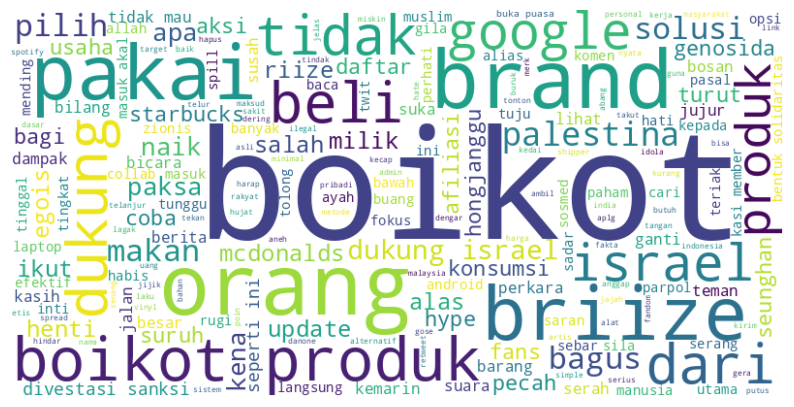

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua kata menjadi satu teks
text = ' '.join(df['stemmer'].explode().dropna().astype(str))

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(df['stemmer'].explode().dropna().astype(str))
word_counts_sorted = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
word_counts_sorted

{'boikot': 189,
 'produk': 23,
 'dukung': 20,
 'orang': 19,
 'brand': 18,
 'israel': 18,
 'pakai': 15,
 'briize': 15,
 'beli': 12,
 'google': 10,
 'palestina': 9,
 'dari': 8,
 'pilih': 8,
 'bagus': 8,
 'makan': 8,
 'solusi': 8,
 'paksa': 7,
 'naik': 7,
 'kena': 7,
 'salah': 6,
 'milik': 6,
 'update': 6,
 'alas': 6,
 'ikut': 6,
 'mcdonalds': 6,
 'egois': 6,
 'masuk': 6,
 'riize': 6,
 'coba': 5,
 'henti': 5,
 'suruh': 5,
 'konsumsi': 5,
 'aksi': 5,
 'usaha': 5,
 'starbucks': 5,
 'turut': 5,
 'pecah': 5,
 'hype': 5,
 'divestasi sanksi': 5,
 'daftar': 5,
 'hongjanggu': 5,
 'fans': 5,
 'seunghan': 5,
 'afiliasi': 5,
 'seperti ini': 5,
 'buka': 5,
 'perkara': 4,
 'genosida': 4,
 'bicara': 4,
 'ganti': 4,
 'bilang': 4,
 'jalan': 4,
 'bosan': 4,
 'suka': 4,
 'jujur': 4,
 'lihat': 4,
 'tidak mau': 4,
 'teman': 4,
 'member': 4,
 'suara': 4,
 'serah': 4,
 'barang': 4,
 'susah': 4,
 'kemarin': 4,
 'dampak': 4,
 'berita': 4,
 'puasa': 4,
 'saran': 3,
 'inti': 3,
 'bentuk': 3,
 'solidaritas': 3,
 'b